In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np

figsize=(4.5,6)
plt.figure(figsize=figsize)

<Figure size 324x432 with 0 Axes>

<Figure size 324x432 with 0 Axes>

In [22]:
with open('C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\data\\all_data\\2019.01.19.withcharged.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    lines = list(reader)
    
# with open('C:\\Users\\theme\\Documents\\scrap\\train.dat', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     lines = list(reader)

# with open('C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\sissoresults.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter='\t')
#     sissolines = list(reader)

with open(
r'C:\Users\RyanTrottier\PycharmProjects\materials\data\sissoresults\02\2020.02.01.perovskites.3d.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    sissolines = list(reader)[150:]
    
with open(
r'C:\Users\RyanTrottier\PycharmProjects\materials\data\sissoresults\02\2020.02.01.spinel.2d.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    sissolines = sissolines + list(reader)[1:]
    # sissolines = list(reader)

def geti(header, lines=lines):
    return(lines[0].index(header))
ubi = geti('ub')
lbi = geti('lb')

def getcol(header, lines=lines):
    i = geti(header, lines=lines)
    try:
        return [float(x[i]) for x in lines[1:]]
    except:
        return [x[i] for x in lines[1:]]

def getavg(line):
    return (float(line[lbi]) + float(line[ubi]))/2

def getavgcol(lines=lines):
    return [getavg(line) for line in lines[1:]]

lowest_lines = []
prev_material = ''
best_line = lines[0]

for line in lines[1:]:
    material = line[0]
    i = int(line[1])
    if i >= 100 and i <= 200:
        continue
    elif material != prev_material:
        lowest_lines.append(best_line)
        best_line = line
    elif getavg(line) < getavg(best_line):
        best_line = line
    prev_material = material
# print('\n'.join(lines[0]))
# print(getcol('material'))

bins = np.arange(0,5.1,0.25)


In [23]:
cutoff = 2.487
definite = []
unsure = []

for line in lowest_lines[1:]:
    avg = getavg(line)
    ub = float(line[ubi])
    lb = float(line[lbi])
    if ub>cutoff and lb<cutoff:
        unsure.append(avg)
    else:
        definite.append(avg)
        

bound_def = np.histogram(definite, bins=bins)[0]
bound_uns = np.histogram(unsure, bins=bins)[0]

print(len(unsure) / (len(unsure) + len(definite)))

0.10465116279069768


Total Failure    : 0.1544
Predicted Failure: 0.1074
SISSO Failure    : 0.0604


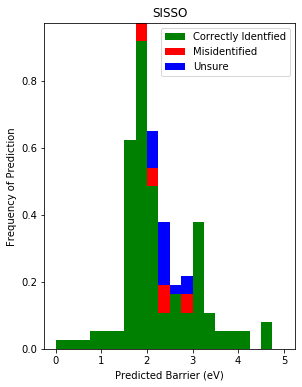

In [24]:
definite = []
unsure = []
wrong = []

for line in sissolines[1:]:
    ub = float(line[1])
    lb = float(line[0])
    y = float(line[2])
    avg = (ub+lb)/2
    if y>cutoff and lb>cutoff and ub>cutoff:
        definite.append(y)
    elif y<cutoff and lb<cutoff and ub<cutoff:
        definite.append(y)
    elif ub>cutoff and lb<cutoff:
        unsure.append(avg)
    else:
        wrong.append(y)
        
plt.figure(figsize=figsize)
plt.hist([definite, wrong, unsure], stacked=True, bins=bins, density=True, color=['green', 'red', 'blue'])
# plt.plot([cutoff, cutoff], [0.7,0])
sisso_def = np.histogram(definite, bins=bins)[0]
sisso_uns = np.histogram(unsure, bins=bins)[0]
sisso_wrng = np.histogram(wrong, bins=bins)[0]
plt.legend(['Fast/Slow Cutoff', 'Correctly Identfied', 'Misidentified', 'Unsure'])
plt.legend(['Correctly Identfied', 'Misidentified', 'Unsure'])
plt.title('SISSO')
plt.xlabel('Predicted Barrier (eV)')
plt.ylabel('Frequency of Prediction')

plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.png".format('sisso'))
print('Total Failure    : {:6.4f}'.format((len(unsure)+len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
print('Predicted Failure: {:6.4f}'.format((len(unsure)/2+len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
print('SISSO Failure    : {:6.4f}'.format((len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
# print('Success          : {:6.4f}'.format((len(definite) + len(wrong)) / (len(unsure) + len(definite) + len(wrong))))

In [25]:
accuracy = np.divide(bound_def, bound_uns + bound_def)
accuracy = [1 if np.isnan(x) else x for x in accuracy]

precision = np.divide(sisso_def, sisso_uns + sisso_def)
precision = [1 if np.isnan(x) else x for x in precision]

sisso_accuracy = np.divide(sisso_wrng, bound_def)
sisso_accuracy = [1 if np.isnan(x) else x for x in sisso_accuracy]

print(sum(np.multiply(sisso_accuracy, bound_uns))/sum(bound_uns))

0.7851851851851852


D:\ProgramData\Miniconda3\envs\default\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
D:\ProgramData\Miniconda3\envs\default\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
D:\ProgramData\Miniconda3\envs\default\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [26]:
data = lines[1:]
data = [line[6:] for line in data]
data = [[float(x) for x in line] for line in data]
y = getavgcol()